In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
players = pd.read_csv('Seasons_Stats.csv',sep=',')

In [3]:
players.head(5)

,Num,Season,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,MVP,VoteWon,VoteMax,VoteShare
0,1,1949,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,NaN,...,176,NaN,NaN,NaN,217,458,0,0.0,0,0.0
1,2,1949,Cliff Barker,SG,29.0,INO,49,NaN,NaN,NaN,...,109,NaN,NaN,NaN,99,279,0,0.0,0,0.0
2,3,1949,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,NaN,...,140,NaN,NaN,NaN,192,438,0,0.0,0,0.0
3,4,1949,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,...,20,NaN,NaN,NaN,29,63,0,0.0,0,0.0
4,5,1949,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,...,20,NaN,NaN,NaN,27,59,0,0.0,0,0.0


In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 57 columns):
Num          24624 non-null int64
Season       24624 non-null int64
Player       24624 non-null object
Pos          24624 non-null object
Age          24616 non-null float64
Tm           24624 non-null object
G            24624 non-null int64
GS           18233 non-null float64
MP           24138 non-null float64
PER          24101 non-null float64
TS%          24538 non-null float64
3PAr         18839 non-null float64
FTr          24525 non-null float64
ORB%         20792 non-null float64
DRB%         20792 non-null float64
TRB%         21571 non-null float64
AST%         22555 non-null float64
STL%         20792 non-null float64
BLK%         20792 non-null float64
TOV%         19582 non-null float64
USG%         19640 non-null float64
blanl        0 non-null float64
OWS          24585 non-null float64
DWS          24585 non-null float64
WS           24585 non-null float64
WS/4

In [5]:
players = players.drop(players.index[:6054])


In [6]:
players = players[(players['MP'] > 2050)]
players.reset_index(inplace=True, drop=True)

In [7]:
players

,Num,Season,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,MVP,VoteWon,VoteMax,VoteShare
0,6086,1980,Kareem Abdul-Jabbar*,C,33.0,LAL,80,NaN,2976.0,25.5,...,272,59.0,228.0,249.0,244,2095,1,286.0,690,0.414493
1,6090,1980,Alvan Adams,C,26.0,PHO,75,NaN,2054.0,20.3,...,344,106.0,69.0,226.0,226,1115,0,0.0,0,0.000000
2,6092,1980,Tiny Archibald*,PG,32.0,BOS,80,72.0,2820.0,14.3,...,618,75.0,18.0,265.0,201,1106,0,32.0,690,0.046377
3,6094,1980,James Bailey,PF,23.0,SEA,82,NaN,2539.0,14.5,...,98,74.0,143.0,219.0,332,1145,0,0.0,0,0.000000
4,6095,1980,Greg Ballard,SF,26.0,WSB,82,NaN,2610.0,16.7,...,195,118.0,39.0,117.0,194,1271,0,0.0,0,0.000000
5,6096,1980,Mike Bantom,SF,29.0,IND,76,NaN,2375.0,14.5,...,240,80.0,85.0,197.0,284,1061,0,0.0,0,0.000000
6,6101,1980,Larry Bird*,PF,24.0,BOS,82,82.0,3239.0,19.9,...,451,161.0,63.0,289.0,239,1741,1,423.0,690,0.613043
7,6102,1980,Otis Birdsong,SG,25.0,KCK,71,NaN,2593.0,20.3,...,233,93.0,18.0,173.0,172,1747,0,0.0,0,0.000000
8,6107,1980,Mike Bratz,PG,25.0,CLE,80,NaN,2595.0,11.5,...,452,136.0,17.0,162.0,194,802,0,0.0,0,0.000000
9,6112,1980,Junior Bridgeman,SF,27.0,MIL,77,NaN,2215.0,17.1,...,234,88.0,28.0,150.0,182,1290,0,0.0,0,0.000000


In [8]:
players_clean = players.drop(['Num','Pos','GS','blanl','blank2','VoteWon','VoteMax'], axis=1)

In [9]:
players_clean.head(5)

,Season,Player,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP,VoteShare
0,1980,Kareem Abdul-Jabbar*,33.0,LAL,80,2976.0,25.5,0.616,0.001,0.379,...,624.0,821.0,272,59.0,228.0,249.0,244,2095,1,0.414493
1,1980,Alvan Adams,26.0,PHO,75,2054.0,20.3,0.567,0.000,0.298,...,389.0,546.0,344,106.0,69.0,226.0,226,1115,0,0.000000
2,1980,Tiny Archibald*,32.0,BOS,80,2820.0,14.3,0.582,0.012,0.547,...,140.0,176.0,618,75.0,18.0,265.0,201,1106,0,0.046377
3,1980,James Bailey,23.0,SEA,82,2539.0,14.5,0.546,0.002,0.406,...,415.0,607.0,98,74.0,143.0,219.0,332,1145,0,0.000000
4,1980,Greg Ballard,26.0,WSB,82,2610.0,16.7,0.500,0.027,0.165,...,413.0,580.0,195,118.0,39.0,117.0,194,1271,0,0.000000


In [10]:
players_clean.describe()

,Season,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP,VoteShare
count,3927.000000,3927.00000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,...,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000
mean,1998.200662,26.89203,77.202445,2560.622867,16.869926,0.545768,0.154636,0.325855,5.702648,14.421925,...,325.725490,453.985994,272.818436,87.787879,52.73644,166.145658,203.764197,1205.913165,0.033868,0.023438
std,10.504710,3.66136,5.646715,327.098904,3.834931,0.038507,0.161703,0.120412,3.520591,6.203983,...,149.522752,217.378145,176.689734,37.698878,53.33465,55.673930,51.647567,392.831772,0.180913,0.114477
min,1980.000000,19.00000,50.000000,2051.000000,7.000000,0.408000,0.000000,0.074000,0.500000,3.200000,...,74.000000,99.000000,21.000000,16.000000,0.00000,43.000000,71.000000,256.000000,0.000000,0.000000
25%,1989.000000,24.00000,75.000000,2283.000000,14.300000,0.520000,0.010000,0.242000,2.700000,9.300000,...,207.000000,273.000000,144.000000,61.000000,17.00000,126.000000,166.000000,916.500000,0.000000,0.000000
50%,1999.000000,27.00000,79.000000,2532.000000,16.300000,0.543000,0.092000,0.309000,4.900000,13.100000,...,292.000000,406.000000,220.000000,81.000000,34.00000,160.000000,201.000000,1150.000000,0.000000,0.000000
75%,2007.000000,29.00000,82.000000,2812.000000,19.000000,0.569000,0.274500,0.392000,8.200000,19.100000,...,420.500000,605.000000,358.000000,108.000000,69.00000,202.000000,240.000000,1443.000000,0.000000,0.000000
max,2016.000000,40.00000,85.000000,3533.000000,31.700000,0.708000,0.756000,1.219000,20.500000,36.800000,...,1007.000000,1530.000000,1164.000000,301.000000,456.00000,464.000000,386.000000,3041.000000,1.000000,1.000000


In [11]:
miss_rate = players_clean.isnull().sum()/len(players_clean)
miss_rate

Season       0.000000
Player       0.000000
Age          0.000000
Tm           0.000000
G            0.000000
MP           0.000000
PER          0.000000
TS%          0.000000
3PAr         0.000000
FTr          0.000000
ORB%         0.000000
DRB%         0.000000
TRB%         0.000000
AST%         0.000000
STL%         0.000000
BLK%         0.000000
TOV%         0.000000
USG%         0.000000
OWS          0.000000
DWS          0.000000
WS           0.000000
WS/48        0.000000
OBPM         0.000000
DBPM         0.000000
BPM          0.000000
VORP         0.000000
FG           0.000000
FGA          0.000000
FG%          0.000000
3P           0.000000
3PA          0.000000
3P%          0.043035
2P           0.000000
2PA          0.000000
2P%          0.000000
eFG%         0.000000
FT           0.000000
FTA          0.000000
FT%          0.000000
ORB          0.000000
DRB          0.000000
TRB          0.000000
AST          0.000000
STL          0.000000
BLK          0.000000
TOV       

In [12]:
team = pd.read_csv('Team_Records.csv',sep=',')

In [13]:
team.head(5)

,Season,Lg,Tm,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017,NBA,BOS,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving?(5.7)
1,2016,NBA,BOS,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas?(12.5)
2,2015,NBA,BOS,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas?(9.7)
3,2014,NBA,BOS,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller?(6.5)
4,2013,NBA,BOS,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass?(5.1)


In [14]:
team_clean = team.drop(['Lg','Finish','SRS','Pace','Rel_Pace','ORtg','Rel_ORtg','DRtg','Rel_DRtg','Playoffs','Coaches','Top WS'], axis=1)

In [15]:
team_clean.head(5)

,Season,Tm,W,L,W/L%
0,2017,BOS,29,10,0.744
1,2016,BOS,53,29,0.646
2,2015,BOS,48,34,0.585
3,2014,BOS,40,42,0.488
4,2013,BOS,25,57,0.305


In [16]:
data_raw = pd.merge(players_clean, team_clean[['Season', 'Tm', 'W/L%']], left_on=['Season','Tm'], right_on=['Season','Tm'], right_index=False,
      how='left', sort=False).fillna(value=0)
data_raw.reset_index(inplace=True, drop=True)


In [17]:
MVPRATE=0.4
data_raw["PPG"] = data_raw["PTS"] /data_raw["G"]
data_raw["APG"] = data_raw["AST"] / data_raw["G"]
data_raw["3PG"] = data_raw["3P"] / data_raw["G"]
data_raw["RPG"] = data_raw["TRB"] / data_raw["G"]
data_raw["FTPG"] = data_raw["FTA"] / data_raw["G"]
data_raw["TOPG"] = data_raw["TOV"] / data_raw["G"]
data_raw["MVP"] = 0
data_raw["MVP"][data_raw['VoteShare']>MVPRATE]=1

C:\Users\yipan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
data_new = data_raw[['Season','Player','Age','G','PER','TS%','ORB%','DRB%','PPG','APG','3PG','RPG','FTPG','TOPG','OWS','DWS','WS','BPM','MVP']]

In [19]:
data_new.head(5)

,Season,Player,Age,G,PER,TS%,ORB%,DRB%,PPG,APG,3PG,RPG,FTPG,TOPG,OWS,DWS,WS,BPM,MVP
0,1980,Kareem Abdul-Jabbar*,33.0,80,25.5,0.616,7.6,21.5,26.187500,3.400000,0.000000,10.262500,6.900000,3.112500,9.6,4.6,14.3,5.3,1
1,1980,Alvan Adams,26.0,75,20.3,0.567,8.6,20.5,14.866667,4.586667,0.000000,7.280000,3.453333,3.013333,3.3,4.5,7.7,5.3,0
2,1980,Tiny Archibald*,32.0,80,14.3,0.582,1.5,5.4,13.825000,7.725000,0.000000,2.200000,5.237500,3.312500,4.6,2.3,6.9,-1.3,0
3,1980,James Bailey,23.0,82,14.5,0.546,8.5,17.6,13.963415,1.195122,0.012195,7.402439,4.402439,2.670732,1.4,3.6,4.9,-0.1,0
4,1980,Greg Ballard,26.0,82,16.7,0.500,6.7,16.8,15.500000,2.378049,0.085366,7.073171,2.390244,1.426829,2.8,4.1,6.9,2.7,0


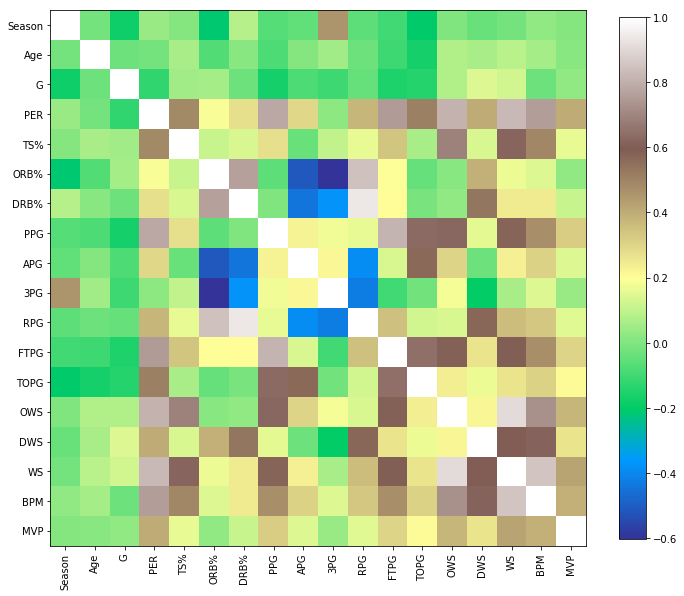

In [20]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
heatmap = ax.imshow(data_new.corr(),
                   cmap='terrain',
                   interpolation='nearest')
plt.xticks(range(data_new.corr().shape[1]), data_new.corr().columns, rotation=90)
plt.yticks(range(data_new.corr().shape[1]), data_new.corr().index)

plt.colorbar(heatmap, shrink=0.8);

Split Data

In [21]:
'''
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
print('Class labels:', np.unique(y))
'''

"\nfrom sklearn.model_selection import train_test_split\n\n\n\nX_train, X_test, y_train, y_test =    train_test_split(X, y, \n                     test_size=0.3, \n                     random_state=0, \n                     stratify=y)\nprint('Class labels:', np.unique(y))\n"

In [22]:
X, y = data_new.iloc[:, 2:18].values, data_new.iloc[:, 18].values
season = 2016
X_train = data_new.loc[data_new['Season'] !=season, :].iloc[:, 2:18].values
y_train = data_new.loc[data_new['Season'] !=season, :].iloc[:, 18].values
X_test = data_new.loc[data_new['Season']==season, :].iloc[:, 2:18].values
y_test = data_new.loc[data_new['Season']==season, :].iloc[:, 18].values

In [23]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [3833   94]
Labels counts in y_train: [3732   91]
Labels counts in y_test: [101   3]


In [24]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

 1) WS                             0.165614
 2) PER                            0.150945
 3) BPM                            0.124716
 4) OWS                            0.089059
 5) PPG                            0.073416
 6) DWS                            0.069027
 7) FTPG                           0.046651
 8) APG                            0.041174
 9) TOPG                           0.040586
10) TS%                            0.032829
11) DRB%                           0.031424
12) 3PG                            0.028585
13) ORB%                           0.028376
14) RPG                            0.027596
15) G                              0.025875
16) Age                            0.024126


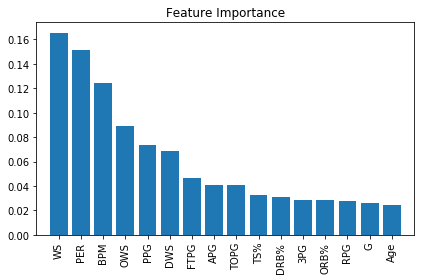

In [25]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = data_new.columns[2:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [26]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

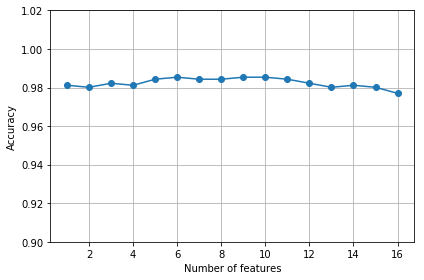

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)
tree = tree.fit(X_train, y_train)


# selecting features
sbs = SBS(tree, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.90, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
k6 = list(sbs.subsets_[10])
print(data_new.columns[2:][k6])

Index(['G', 'PPG', 'APG', 'TOPG', 'OWS', 'WS'], dtype='object')


In [29]:
tree = tree.fit(X_train, y_train)
print('Training accuracy:', tree.score(X_train_std, y_train))
print('Test accuracy:', tree.score(X_test_std, y_test))

Training accuracy: 0.9761967041590374
Test accuracy: 0.9711538461538461


In [30]:
tree = tree.fit(X_train, y_train)
test_pred = tree.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results.sort_values('MVP',ascending=False)

,Player,MVP
3878,LeBron James,1
3884,Kawhi Leonard,1
3823,Steven Adams,0
3889,Wesley Matthews,0
3899,Kristaps Porzingis,0
3898,Otto Porter,0
3897,Mason Plumlee,0
3896,Elfrid Payton,0
3895,Victor Oladipo,0
3894,Markieff Morris,0


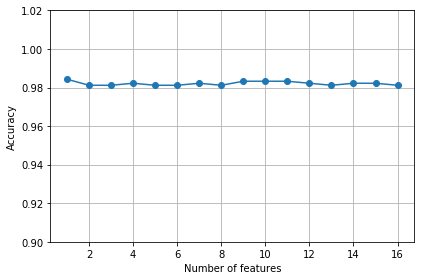

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=50, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
# selecting features

sbs = SBS(forest, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.90, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
k3 = list(sbs.subsets_[13])
print(data_new.columns[2:][k3])

Index(['PER', 'APG', 'WS'], dtype='object')


In [33]:
forest = forest.fit(X_train, y_train)
print('Training accuracy:', forest.score(X_train_std, y_train))
print('Test accuracy:', forest.score(X_test_std, y_test))

Training accuracy: 0.9761967041590374
Test accuracy: 0.9711538461538461


In [34]:
forest = forest.fit(X_train, y_train)
test_pred = forest.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results.sort_values('MVP',ascending=False)

,Player,MVP
3823,Steven Adams,0
3824,LaMarcus Aldridge,0
3899,Kristaps Porzingis,0
3898,Otto Porter,0
3897,Mason Plumlee,0
3896,Elfrid Payton,0
3895,Victor Oladipo,0
3894,Markieff Morris,0
3893,Marcus Morris,0
3892,Paul Millsap,0


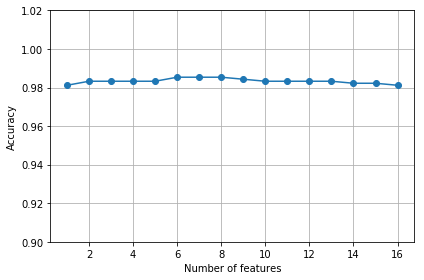

In [35]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# selecting features
sbs = SBS(clf, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.90, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
k5 = list(sbs.subsets_[11])
print(data_new.columns[2:][k5])

Index(['G', 'TS%', 'DRB%', 'TOPG', 'WS'], dtype='object')


In [37]:
clf = clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy:', clf.score(X_test_std, y_test))

Training accuracy: 0.7588281454355218
Test accuracy: 0.9326923076923077


In [38]:
clf = clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results.sort_values('MVP',ascending=False)

,Player,MVP
3878,LeBron James,1
3853,Kevin Durant,1
3866,James Harden,1
3823,Steven Adams,0
3889,Wesley Matthews,0
3898,Otto Porter,0
3897,Mason Plumlee,0
3896,Elfrid Payton,0
3895,Victor Oladipo,0
3894,Markieff Morris,0


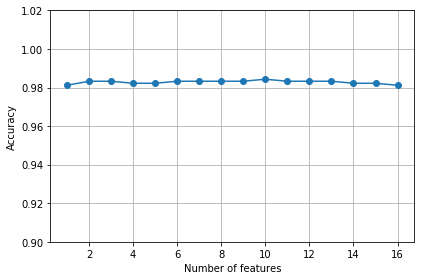

In [39]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
clf_smote = LinearSVC().fit(X_resampled, y_resampled)

# selecting features
sbs = SBS(clf_smote, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.90, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()


In [40]:
k5 = list(sbs.subsets_[11])
print(data_new.columns[2:][k5])

Index(['Age', 'G', 'TS%', 'PPG', 'WS'], dtype='object')


In [41]:
clf_smote = clf_smote.fit(X_train, y_train)
print('Training accuracy:', clf_smote.score(X_train_std, y_train))
print('Test accuracy:', clf_smote.score(X_test_std, y_test))

Training accuracy: 0.7590897201150929
Test accuracy: 0.9326923076923077


In [42]:
clf_smote = clf_smote.fit(X_train, y_train)
test_pred = clf_smote.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results.sort_values('MVP',ascending=False)

,Player,MVP
3866,James Harden,1
3823,Steven Adams,0
3889,Wesley Matthews,0
3899,Kristaps Porzingis,0
3898,Otto Porter,0
3897,Mason Plumlee,0
3896,Elfrid Payton,0
3895,Victor Oladipo,0
3894,Markieff Morris,0
3893,Marcus Morris,0


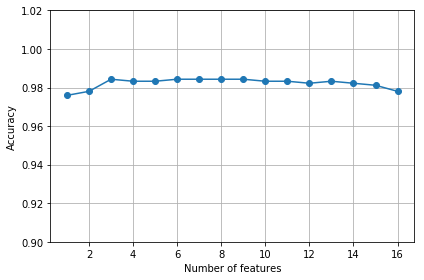

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=25, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)
bag = bag.fit(X_train, y_train)


# selecting features
sbs = SBS(bag, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.90, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [44]:
k5 = list(sbs.subsets_[-5])
print(data_new.columns[2:][k5])

Index(['ORB%', 'DRB%', 'PPG', 'OWS', 'DWS'], dtype='object')


In [45]:
bag = bag.fit(X_train, y_train)
print('Training accuracy:', bag.score(X_train_std, y_train))
print('Test accuracy:', bag.score(X_test_std, y_test))

Training accuracy: 0.9761967041590374
Test accuracy: 0.9711538461538461


In [46]:
bag = bag.fit(X_train, y_train)
test_pred = bag.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results.sort_values('MVP',ascending=False)

,Player,MVP
3878,LeBron James,1
3823,Steven Adams,0
3889,Wesley Matthews,0
3899,Kristaps Porzingis,0
3898,Otto Porter,0
3897,Mason Plumlee,0
3896,Elfrid Payton,0
3895,Victor Oladipo,0
3894,Markieff Morris,0
3893,Marcus Morris,0
